In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import warnings
warnings.filterwarnings('ignore')

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Set up plot aesthetics
plt.style.use('ggplot')
sns.set(style='whitegrid')


In [44]:
# Define common English stopwords manually (avoiding NLTK dependency)
STOPWORDS = {
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", 
    "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 
    'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 
    'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 
    'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 
    'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 
    'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 
    'while', 'of', 'at', 'by', 'for', 'with', 'through', 'during', 'before', 'after', 
    'above', 'below', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 
    'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 
    'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 
    'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 
    'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 
    've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', 
    "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 
    'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 
    'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', 
    "wouldn't"
}


In [46]:
# Load datasets
train_data = pd.read_csv(r"c:\Users\YASH\Downloads\archive (1)\train.csv", encoding='latin1')
test_data = pd.read_csv(r"C:\Users\YASH\Downloads\archive (1)\test.csv", encoding='latin1')

# Display basic information
print("Training data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

Training data shape: (27481, 10)
Test data shape: (4815, 9)


In [47]:
# Preview the first few rows of the training data
print("\nFirst 5 rows of training data:")
print(train_data.head())


First 5 rows of training data:
       textID                                               text  \
0  cb774db0d1                I`d have responded, if I were going   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2  088c60f138                          my boss is bullying me...   
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   Sons of ****, why couldn`t they put them on t...   

                         selected_text sentiment Time of Tweet Age of User  \
0  I`d have responded, if I were going   neutral       morning        0-20   
1                             Sooo SAD  negative          noon       21-30   
2                          bullying me  negative         night       31-45   
3                       leave me alone  negative       morning       46-60   
4                        Sons of ****,  negative          noon       60-70   

       Country  Population -2020  Land Area (Km²)  Density (P/Km²)  
0  Afghanistan       

In [48]:
# Check for missing values and convert to string
print("\nMissing values in training data:")
print(train_data.isnull().sum())

print("\nMissing values in test data:")
print(test_data.isnull().sum())

# Convert 'text' to string to avoid errors with NaN values
train_data['text'] = train_data['text'].astype(str)
test_data['text'] = test_data['text'].astype(str)



Missing values in training data:
textID              0
text                1
selected_text       1
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64

Missing values in test data:
textID              1281
text                1281
sentiment           1281
Time of Tweet       1281
Age of User         1281
Country             1281
Population -2020    1281
Land Area (Km²)     1281
Density (P/Km²)     1281
dtype: int64


In [49]:
def simple_tokenize(text):
    """
    Simple tokenization without NLTK dependency.
    """
    # Convert to lowercase and split on whitespace and punctuation
    text = str(text).lower()
    # Replace punctuation with spaces, then split
    text = re.sub(r'[^\w\s]', ' ', text)
    tokens = text.split()
    return tokens

def clean_text_simple(text):
    """
    Clean and preprocess text data without heavy NLTK dependencies.
    
    Args:
        text (str): Input text
        
    Returns:
        str: Cleaned text
    """
    if pd.isna(text) or text == 'nan':
        return ""
        
    # Convert to lowercase
    text = str(text).lower()
    
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # Remove user mentions and hashtags
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    
    # Remove special characters and numbers, keep only letters and spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

def preprocess_text_simple(text):
    """
    Full preprocessing pipeline without NLTK dependencies.
    
    Args:
        text (str): Input text
        
    Returns:
        str: Preprocessed text
    """
    if pd.isna(text) or text == 'nan':
        return ""
    
    try:
        # Clean text
        text = clean_text_simple(text)
        
        # Skip if text is empty after cleaning
        if not text or text.strip() == "":
            return ""
        
        # Simple tokenization
        tokens = simple_tokenize(text)
        
        # Remove stopwords and short tokens
        tokens = [token for token in tokens if token not in STOPWORDS and len(token) > 2]
        
        # Join tokens back into text
        processed_text = ' '.join(tokens)
        
        return processed_text
        
    except Exception as e:
        print(f"Error processing text: {str(text)[:50]}... Error: {e}")
        return ""


In [50]:
# Test the preprocessing function
print("Testing simple preprocessing function...")
sample_texts = [
    "I love this movie! It's absolutely amazing @user #greatfilm",
    "This is terrible :( I hate it so much!!!",
    "Just okay, nothing special really...",
    "Check out this link: https://example.com and follow @someone",
    ""  # Empty text
]

for text in sample_texts:
    processed = preprocess_text_simple(text)
    print(f"Original: '{text}'")
    print(f"Processed: '{processed}'")
    print("---")

# %%
# Process the data in batches
def process_dataframe_simple(df, text_column, batch_size=1000):
    """
    Process text data in batches with progress updates.
    """
    total_rows = len(df)
    processed_texts = []
    
    for i in range(0, total_rows, batch_size):
        batch_end = min(i + batch_size, total_rows)
        batch = df[text_column].iloc[i:batch_end]
        
        print(f"Processing batch {i//batch_size + 1}/{(total_rows-1)//batch_size + 1} "
              f"(rows {i+1}-{batch_end} of {total_rows})")
        
        batch_processed = batch.apply(preprocess_text_simple)
        processed_texts.extend(batch_processed.tolist())
    
    return processed_texts


Testing simple preprocessing function...
Original: 'I love this movie! It's absolutely amazing @user #greatfilm'
Processed: 'love movie absolutely amazing'
---
Original: 'This is terrible :( I hate it so much!!!'
Processed: 'terrible hate much'
---
Original: 'Just okay, nothing special really...'
Processed: 'okay nothing special really'
---
Original: 'Check out this link: https://example.com and follow @someone'
Processed: 'check link follow'
---
Original: ''
Processed: ''
---


In [51]:
print("Preprocessing training data with simple method...")
train_data['processed_text'] = process_dataframe_simple(train_data, 'text')

print("\nPreprocessing test data with simple method...")
test_data['processed_text'] = process_dataframe_simple(test_data, 'text')

print("Preprocessing complete!")

Preprocessing training data with simple method...
Processing batch 1/28 (rows 1-1000 of 27481)
Processing batch 2/28 (rows 1001-2000 of 27481)
Processing batch 3/28 (rows 2001-3000 of 27481)
Processing batch 4/28 (rows 3001-4000 of 27481)
Processing batch 5/28 (rows 4001-5000 of 27481)
Processing batch 6/28 (rows 5001-6000 of 27481)
Processing batch 7/28 (rows 6001-7000 of 27481)
Processing batch 8/28 (rows 7001-8000 of 27481)
Processing batch 9/28 (rows 8001-9000 of 27481)
Processing batch 10/28 (rows 9001-10000 of 27481)
Processing batch 11/28 (rows 10001-11000 of 27481)
Processing batch 12/28 (rows 11001-12000 of 27481)
Processing batch 13/28 (rows 12001-13000 of 27481)
Processing batch 14/28 (rows 13001-14000 of 27481)
Processing batch 15/28 (rows 14001-15000 of 27481)
Processing batch 16/28 (rows 15001-16000 of 27481)
Processing batch 17/28 (rows 16001-17000 of 27481)
Processing batch 18/28 (rows 17001-18000 of 27481)
Processing batch 19/28 (rows 18001-19000 of 27481)
Processing b

In [52]:
# Display examples of original vs processed text
print("\nOriginal vs Processed Text Examples:")
for i in range(min(5, len(train_data))):
    if len(str(train_data.iloc[i]['text'])) > 0:  # Skip empty texts
        print(f"Original: {train_data.iloc[i]['text'][:100]}...")
        print(f"Processed: {train_data.iloc[i]['processed_text'][:100]}...")
        print("---")



Original vs Processed Text Examples:
Original:  I`d have responded, if I were going...
Processed: responded going...
---
Original:  Sooo SAD I will miss you here in San Diego!!!...
Processed: sooo sad miss san diego...
---
Original: my boss is bullying me......
Processed: boss bullying...
---
Original:  what interview! leave me alone...
Processed: interview leave alone...
---
Original:  Sons of ****, why couldn`t they put them on the releases we already bought...
Processed: sons couldnt put releases already bought...
---


In [53]:
# Check for empty processed texts
empty_processed = train_data['processed_text'].str.strip().eq('').sum()
print(f"Number of empty processed texts in training data: {empty_processed}")

empty_processed_test = test_data['processed_text'].str.strip().eq('').sum()
print(f"Number of empty processed texts in test data: {empty_processed_test}")


Number of empty processed texts in training data: 95
Number of empty processed texts in test data: 1297


In [54]:
# Remove rows with empty processed text
print(f"Training data shape before removing empty texts: {train_data.shape}")
train_data = train_data[train_data['processed_text'].str.strip() != ''].copy()
print(f"Training data shape after removing empty texts: {train_data.shape}")

print(f"Test data shape before removing empty texts: {test_data.shape}")
test_data = test_data[test_data['processed_text'].str.strip() != ''].copy()
print(f"Test data shape after removing empty texts: {test_data.shape}")


Training data shape before removing empty texts: (27481, 11)
Training data shape after removing empty texts: (27386, 11)
Test data shape before removing empty texts: (4815, 10)
Test data shape after removing empty texts: (3518, 10)



Sentiment distribution in training data:
sentiment
neutral     11034
positive     8579
negative     7773
Name: count, dtype: int64


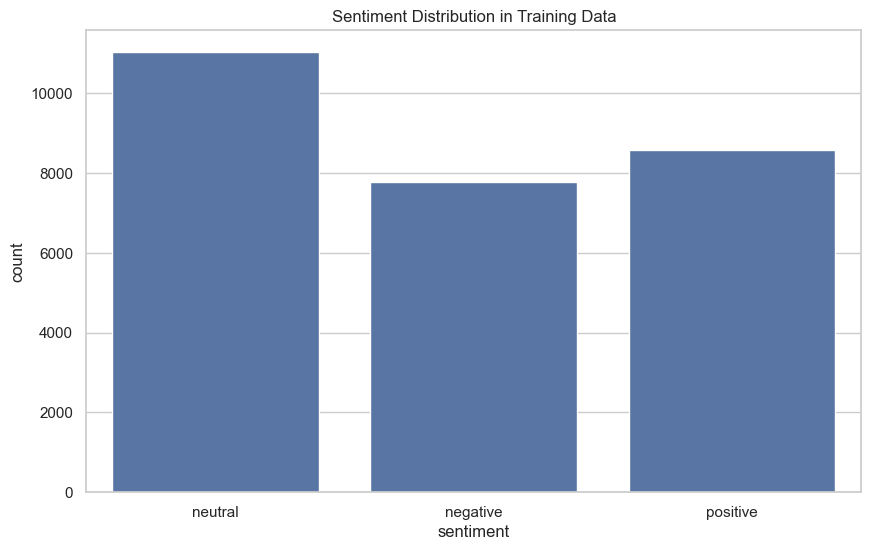

In [55]:
# Sentiment distribution visualization
if 'sentiment' in train_data.columns:
    print("\nSentiment distribution in training data:")
    print(train_data['sentiment'].value_counts())
    
    plt.figure(figsize=(10, 6))
    sns.countplot(data=train_data, x='sentiment')
    plt.title('Sentiment Distribution in Training Data')
    plt.show()

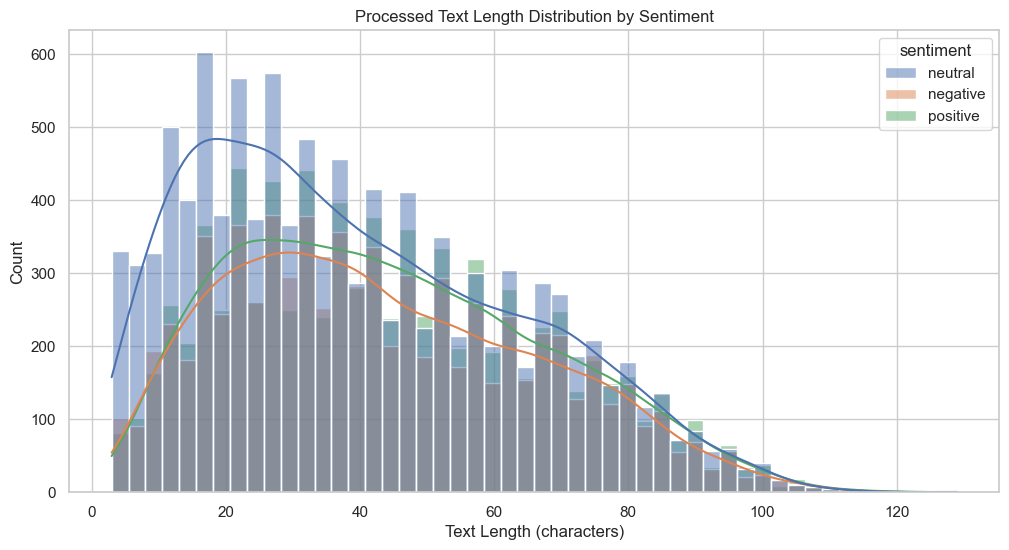

In [56]:
# Text length analysis
train_data['text_length'] = train_data['processed_text'].apply(len)
plt.figure(figsize=(12, 6))
if 'sentiment' in train_data.columns:
    sns.histplot(data=train_data, x='text_length', hue='sentiment', bins=50, kde=True)
    plt.title('Processed Text Length Distribution by Sentiment')
else:
    sns.histplot(data=train_data, x='text_length', bins=50, kde=True)
    plt.title('Processed Text Length Distribution')
plt.xlabel('Text Length (characters)')
plt.show()

In [57]:
print("Text preprocessing completed successfully!")
print("Ready for model training phase.")

Text preprocessing completed successfully!
Ready for model training phase.


In [58]:
# Encode sentiment labels for training
# Map text labels to numerical values if needed
sentiment_mapping = {'negative': 0, 'neutral': 2, 'positive': 4}

# Check if sentiment column contains text labels or numerical values
if 'sentiment' in train_data.columns:
    if train_data['sentiment'].dtype == 'object':
        train_data['sentiment_encoded'] = train_data['sentiment'].map(sentiment_mapping)
        if 'sentiment' in test_data.columns:
            test_data['sentiment_encoded'] = test_data['sentiment'].map(sentiment_mapping)
    else:
        # If they're already numerical, just copy them
        train_data['sentiment_encoded'] = train_data['sentiment']
        if 'sentiment' in test_data.columns:
            test_data['sentiment_encoded'] = test_data['sentiment']
    
    print("Sentiment encoding completed.")
    print("Unique sentiment values:", train_data['sentiment_encoded'].unique())
else:
    print("No sentiment column found in training data.")


Sentiment encoding completed.
Unique sentiment values: [2 0 4]


In [59]:
# Handle missing values in test set
if 'sentiment' in test_data.columns:
    test_data = test_data.dropna(subset=['text', 'sentiment'])
    print(f"Test data shape after removing missing values: {test_data.shape}")


Test data shape after removing missing values: (3518, 11)


In [60]:
# Split the training data into training and validation sets
if 'sentiment_encoded' in train_data.columns:
    X_train, X_val, y_train, y_val = train_test_split(
        train_data['processed_text'], 
        train_data['sentiment_encoded'],
        test_size=0.2,
        random_state=42,
        stratify=train_data['sentiment_encoded']
    )
    
    print("Training set size:", X_train.shape[0])
    print("Validation set size:", X_val.shape[0])
    print("Class distribution in training set:")
    print(y_train.value_counts().sort_index())
else:
    print("Cannot split data - sentiment_encoded column not found")


Training set size: 21908
Validation set size: 5478
Class distribution in training set:
sentiment_encoded
0    6218
2    8827
4    6863
Name: count, dtype: int64


In [61]:
# Model Training and Evaluation Function
def train_evaluate_model(model_name, vectorizer, classifier, X_train, y_train, X_val, y_val):
    """
    Train and evaluate a text classification model.

    Args:
        model_name (str): Name of the model for reporting
        vectorizer: Text vectorizer (CountVectorizer or TfidfVectorizer)
        classifier: Classifier model
        X_train, y_train: Training data
        X_val, y_val: Validation data

    Returns:
        tuple: Trained pipeline and accuracy score
    """
    # Create a pipeline
    pipeline = Pipeline([
        ('vectorizer', vectorizer),
        ('classifier', classifier)
    ])
    
    # Train the model
    print(f"Training {model_name}...")
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_val)
    
    # Evaluate the model
    accuracy = accuracy_score(y_val, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    
    # Generate classification report
    print("\nClassification Report:")
    print(classification_report(y_val, y_pred))
    
    # Generate confusion matrix
    cm = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Negative', 'Neutral', 'Positive'],
                yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()
    
    return pipeline, accuracy

In [62]:
# Define vectorizers and models to try
count_vectorizer = CountVectorizer(max_features=5000, ngram_range=(1,2))
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))

models = [
    ('Logistic Regression with Count Vectors', count_vectorizer, LogisticRegression(max_iter=1000, C=1.0)),
    ('Logistic Regression with TF-IDF', tfidf_vectorizer, LogisticRegression(max_iter=1000, C=1.0)),
    ('Naive Bayes with Count Vectors', count_vectorizer, MultinomialNB()),
    ('Naive Bayes with TF-IDF', tfidf_vectorizer, MultinomialNB()),
    ('Linear SVC with TF-IDF', tfidf_vectorizer, LinearSVC(max_iter=1000)),
    ('Random Forest with TF-IDF', tfidf_vectorizer, RandomForestClassifier(n_estimators=100, random_state=42))
]

print("Models to train:", len(models))


Models to train: 6


Starting model training and evaluation...
Training Logistic Regression with Count Vectors...
Logistic Regression with Count Vectors Accuracy: 0.6880

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.60      0.65      1555
           2       0.62      0.73      0.67      2207
           4       0.77      0.71      0.74      1716

    accuracy                           0.69      5478
   macro avg       0.70      0.68      0.69      5478
weighted avg       0.70      0.69      0.69      5478



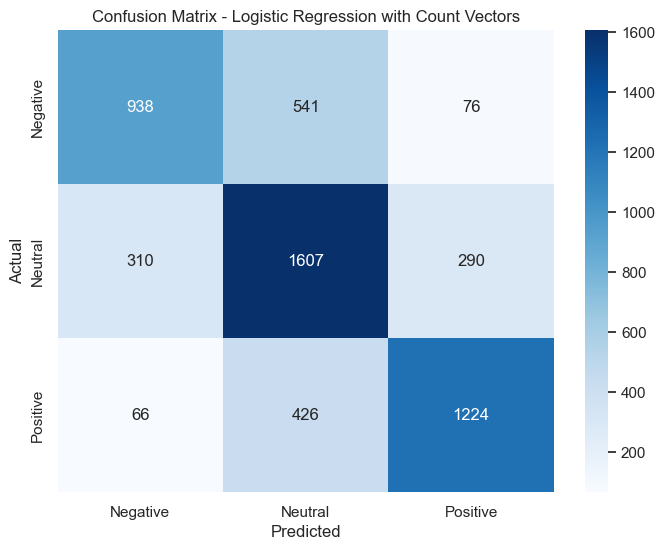

✓ Logistic Regression with Count Vectors completed
Training Logistic Regression with TF-IDF...
Logistic Regression with TF-IDF Accuracy: 0.6909

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.59      0.65      1555
           2       0.62      0.75      0.68      2207
           4       0.79      0.70      0.74      1716

    accuracy                           0.69      5478
   macro avg       0.71      0.68      0.69      5478
weighted avg       0.70      0.69      0.69      5478



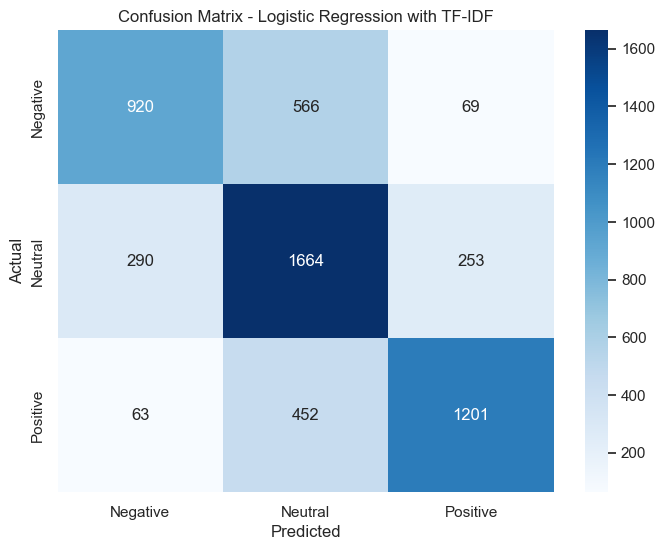

✓ Logistic Regression with TF-IDF completed
Training Naive Bayes with Count Vectors...
Naive Bayes with Count Vectors Accuracy: 0.6526

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.60      0.63      1555
           2       0.59      0.69      0.63      2207
           4       0.74      0.66      0.70      1716

    accuracy                           0.65      5478
   macro avg       0.67      0.65      0.65      5478
weighted avg       0.66      0.65      0.65      5478



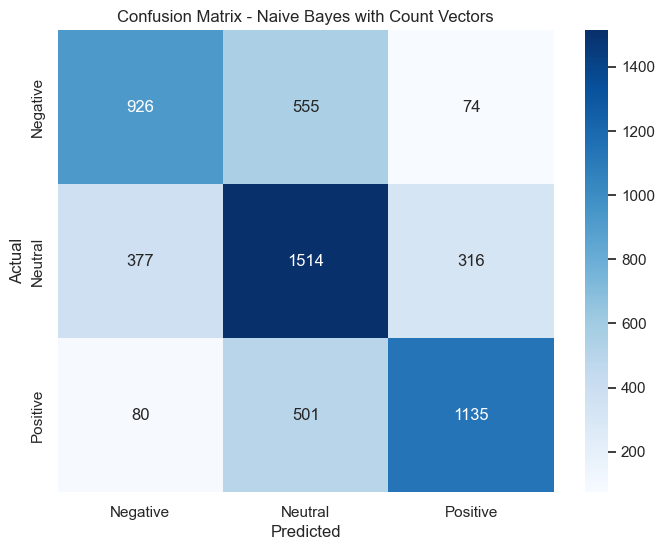

✓ Naive Bayes with Count Vectors completed
Training Naive Bayes with TF-IDF...
Naive Bayes with TF-IDF Accuracy: 0.6420

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.49      0.59      1555
           2       0.56      0.78      0.65      2207
           4       0.76      0.61      0.68      1716

    accuracy                           0.64      5478
   macro avg       0.68      0.62      0.64      5478
weighted avg       0.67      0.64      0.64      5478



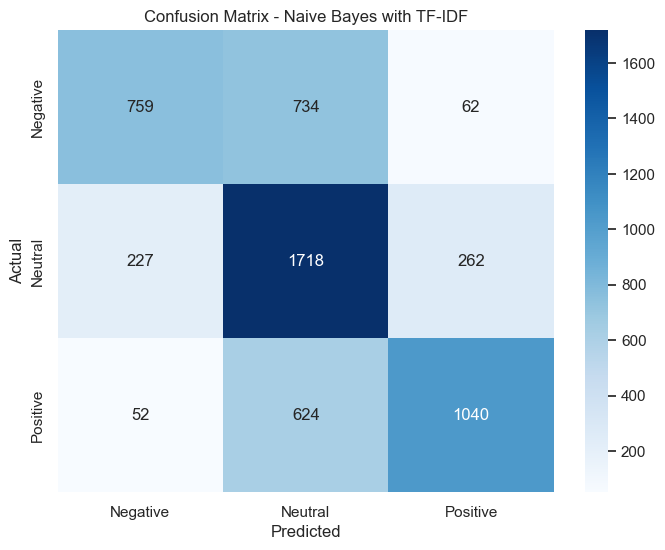

✓ Naive Bayes with TF-IDF completed
Training Linear SVC with TF-IDF...
Linear SVC with TF-IDF Accuracy: 0.6778

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.62      0.65      1555
           2       0.63      0.69      0.66      2207
           4       0.74      0.72      0.73      1716

    accuracy                           0.68      5478
   macro avg       0.69      0.67      0.68      5478
weighted avg       0.68      0.68      0.68      5478



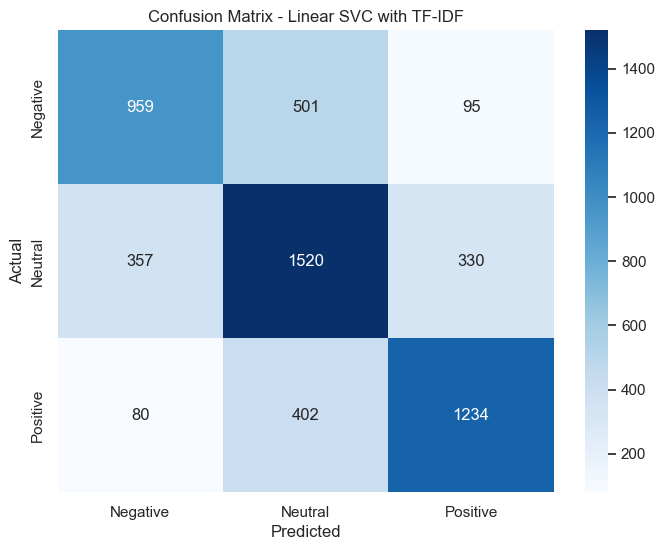

✓ Linear SVC with TF-IDF completed
Training Random Forest with TF-IDF...
Random Forest with TF-IDF Accuracy: 0.7008

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.61      0.66      1555
           2       0.66      0.72      0.69      2207
           4       0.74      0.76      0.75      1716

    accuracy                           0.70      5478
   macro avg       0.71      0.70      0.70      5478
weighted avg       0.70      0.70      0.70      5478



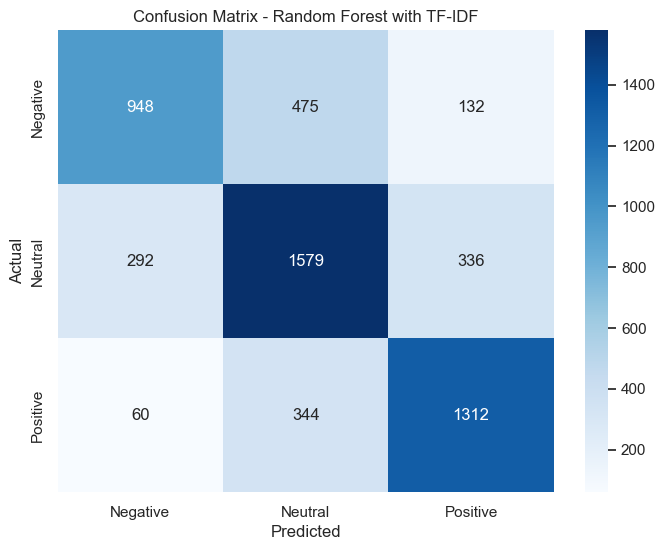

✓ Random Forest with TF-IDF completed

Completed training 6 models successfully.


In [63]:
# Train and evaluate each model
if 'sentiment_encoded' in train_data.columns:
    results = {}
    print("Starting model training and evaluation...")
    
    for model_name, vectorizer, classifier in models:
        try:
            pipeline, accuracy = train_evaluate_model(
                model_name, vectorizer, classifier, X_train, y_train, X_val, y_val
            )
            results[model_name] = (pipeline, accuracy)
            print(f"✓ {model_name} completed\n" + "="*50)
        except Exception as e:
            print(f"✗ Error training {model_name}: {e}")
            print("="*50)
    
    print(f"\nCompleted training {len(results)} models successfully.")
else:
    print("Cannot train models - no sentiment labels available")


In [64]:
# Find and display the best model
if 'results' in locals() and results:
    best_model_name = max(results.keys(), key=lambda k: results[k][1])
    best_pipeline, best_accuracy = results[best_model_name]
    
    print(f"🏆 Best model: {best_model_name}")
    print(f"🎯 Best accuracy: {best_accuracy:.4f}")
    
    # Display all model results
    print("\n📊 All Model Results:")
    print("-" * 60)
    for model_name, (pipeline, accuracy) in sorted(results.items(), key=lambda x: x[1][1], reverse=True):
        print(f"{model_name:<40} | Accuracy: {accuracy:.4f}")


🏆 Best model: Random Forest with TF-IDF
🎯 Best accuracy: 0.7008

📊 All Model Results:
------------------------------------------------------------
Random Forest with TF-IDF                | Accuracy: 0.7008
Logistic Regression with TF-IDF          | Accuracy: 0.6909
Logistic Regression with Count Vectors   | Accuracy: 0.6880
Linear SVC with TF-IDF                   | Accuracy: 0.6778
Naive Bayes with Count Vectors           | Accuracy: 0.6526
Naive Bayes with TF-IDF                  | Accuracy: 0.6420


Performing detailed evaluation of the best model...
Detailed evaluation for Random Forest with TF-IDF:
              precision  recall  f1-score    support
0                0.7292  0.6096    0.6641  1555.0000
2                0.6585  0.7155    0.6858  2207.0000
4                0.7371  0.7646    0.7506  1716.0000
accuracy         0.7008  0.7008    0.7008     0.7008
macro avg        0.7083  0.6966    0.7001  5478.0000
weighted avg     0.7032  0.7008    0.6999  5478.0000


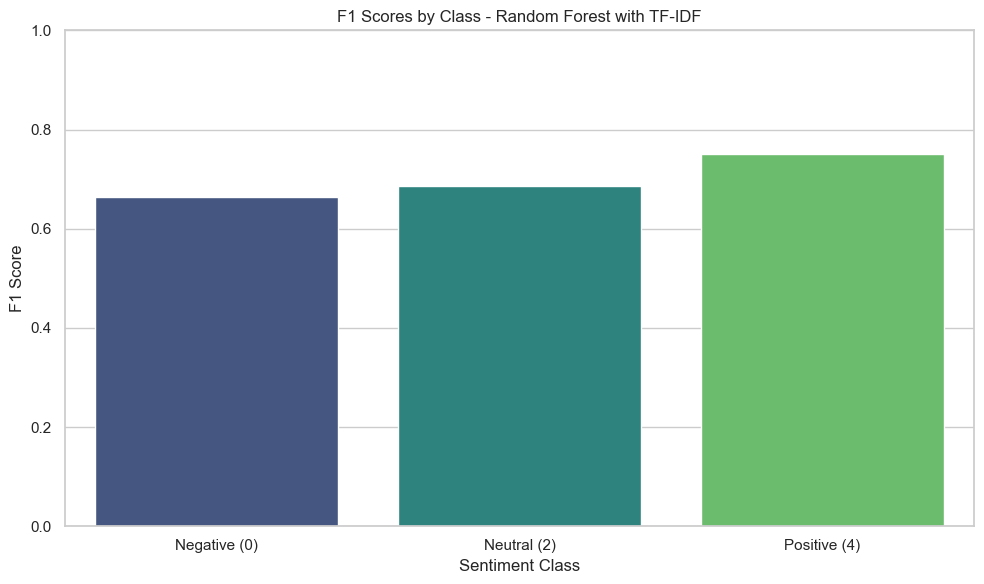

In [65]:
# Detailed evaluation of the best model
if 'best_pipeline' in locals():
    print("Performing detailed evaluation of the best model...")
    
    # Make predictions on validation set
    y_val_pred = best_pipeline.predict(X_val)
    
    def detailed_evaluation(y_true, y_pred, model_name):
        """Perform detailed evaluation of model performance"""
        # Classification report as DataFrame
        report = classification_report(y_true, y_pred, output_dict=True)
        report_df = pd.DataFrame(report).transpose()
        
        print(f"Detailed evaluation for {model_name}:")
        print(report_df.round(4))
        
        # Visualize F1-scores by class
        plt.figure(figsize=(10, 6))
        class_labels = ['0', '2', '4']  # negative, neutral, positive
        if all(label in report_df.index for label in class_labels):
            sns.barplot(x=class_labels, y=report_df.loc[class_labels, 'f1-score'], palette="viridis")
            plt.title(f'F1 Scores by Class - {model_name}')
            plt.ylabel("F1 Score")
            plt.ylim(0, 1)
            plt.xlabel("Sentiment Class")
            plt.xticks([0, 1, 2], ['Negative (0)', 'Neutral (2)', 'Positive (4)'])
            plt.tight_layout()
            plt.show()
        
        return report_df
    
    detailed_results = detailed_evaluation(y_val, y_val_pred, best_model_name)


In [66]:
# Analyze misclassified examples
if 'y_val_pred' in locals():
    print("Analyzing misclassified examples...")
    
    # Find misclassified examples
    misclassified_indices = np.where(y_val.values != y_val_pred)[0]
    
    if len(misclassified_indices) > 0:
        misclassified_examples = pd.DataFrame({
            'text': X_val.iloc[misclassified_indices].values,
            'true_sentiment': y_val.iloc[misclassified_indices].values,
            'predicted_sentiment': y_val_pred[misclassified_indices]
        })
        
        print(f"\nFound {len(misclassified_examples)} misclassified examples")
        print("\nSample of misclassified examples:")
        print(misclassified_examples.head(10))
        
        # Show distribution of misclassifications
        print("\nMisclassification patterns:")
        misclass_pattern = misclassified_examples.groupby(['true_sentiment', 'predicted_sentiment']).size()
        print(misclass_pattern)
    else:
        print("No misclassified examples found!")

Analyzing misclassified examples...

Found 1639 misclassified examples

Sample of misclassified examples:
                                                text  true_sentiment  \
0                         thinks twitter doesnt like               0   
1  people dont get into fender benders way school...               4   
2  followed recently please dont offended havent ...               4   
3                                   doesnt sound fun               0   
4                            awe sorry probably true               4   
5  fully understands cats cabin fever holy really...               2   
6  guessed leg havent healed from old injuries st...               2   
7  blah blah blah kidding dude ive never anyone o...               4   
8  yeah teased into boofy bitim buying red hair e...               4   
9                  night diana travel soon take care               4   

   predicted_sentiment  
0                    2  
1                    2  
2                    2  
3

In [67]:
# Model saving and loading functions
import pickle

def save_model(model, filename):
    """Save a trained model to a file."""
    with open(filename, 'wb') as file:
        pickle.dump(model, file)
    print(f"Model saved to {filename}")

def load_model(filename):
    """Load a trained model from a file."""
    with open(filename, 'rb') as file:
        model = pickle.load(file)
    return model

def predict_sentiment(text, model):
    """Predict sentiment for new text."""
    processed_text = preprocess_text_simple(text)
    prediction = model.predict([processed_text])[0]
    
    # Get probability if available
    try:
        probabilities = model.predict_proba([processed_text])[0]
    except:
        probabilities = None
    
    return prediction, probabilities

# Save the best model
if 'best_pipeline' in locals():
    model_filename = 'sentiment_analysis_model.pkl'
    save_model(best_pipeline, model_filename)
    print(f"✓ Best model saved as {model_filename}")

Model saved to sentiment_analysis_model.pkl
✓ Best model saved as sentiment_analysis_model.pkl


In [68]:
# Test the saved model with new examples
if 'best_pipeline' in locals():
    print("Testing the model with new examples...")
    
    test_texts = [
        "I absolutely love this product! It's amazing!",
        "The service was okay, nothing special.",
        "This is the worst experience I've ever had. Terrible customer service.",
        "Great quality and fast delivery! Highly recommended!",
        "Not bad, but could be better. Average experience.",
        "Awful! Complete waste of money. Very disappointed."
    ]
    
    print("\n🧪 Testing model predictions:")
    print("-" * 60)
    
    sentiment_labels = {0: "Negative", 2: "Neutral", 4: "Positive"}
    
    for i, text in enumerate(test_texts, 1):
        prediction, probabilities = predict_sentiment(text, best_pipeline)
        sentiment_label = sentiment_labels.get(prediction, "Unknown")
        
        print(f"\n{i}. Text: {text}")
        print(f"   Predicted: {sentiment_label} ({prediction})")
        
        if probabilities is not None:
            print(f"   Confidence: {max(probabilities):.3f}")


Testing the model with new examples...

🧪 Testing model predictions:
------------------------------------------------------------

1. Text: I absolutely love this product! It's amazing!
   Predicted: Positive (4)
   Confidence: 0.990

2. Text: The service was okay, nothing special.
   Predicted: Neutral (2)
   Confidence: 0.662

3. Text: This is the worst experience I've ever had. Terrible customer service.
   Predicted: Negative (0)
   Confidence: 0.800

4. Text: Great quality and fast delivery! Highly recommended!
   Predicted: Positive (4)
   Confidence: 0.873

5. Text: Not bad, but could be better. Average experience.
   Predicted: Neutral (2)
   Confidence: 0.467

6. Text: Awful! Complete waste of money. Very disappointed.
   Predicted: Negative (0)
   Confidence: 0.840


In [69]:
# Create a complete prediction function for deployment
def complete_sentiment_analysis(text):
    """
    Complete sentiment analysis pipeline for a single text.
    
    Args:
        text (str): Input text to analyze
        
    Returns:
        dict: Complete analysis results
    """
    # Load model (in production, you'd load this once and reuse)
    try:
        model = load_model('sentiment_analysis_model.pkl')
    except FileNotFoundError:
        return {"error": "Model file not found. Please train the model first."}
    
    # Preprocess text
    processed_text = preprocess_text_simple(text)
    
    if not processed_text.strip():
        return {"error": "Text contains no meaningful content after preprocessing."}
    
    # Make prediction
    prediction = model.predict([processed_text])[0]
    
    # Get probabilities if available
    try:
        probabilities = model.predict_proba([processed_text])[0]
        confidence = max(probabilities)
    except:
        probabilities = None
        confidence = None
    
    # Map prediction to label
    sentiment_map = {0: "Negative", 2: "Neutral", 4: "Positive"}
    sentiment_label = sentiment_map.get(prediction, "Unknown")
    
    # Prepare results
    result = {
        'original_text': text,
        'processed_text': processed_text,
        'sentiment_code': int(prediction),
        'sentiment_label': sentiment_label,
        'confidence': confidence
    }
    
    if probabilities is not None:
        result['probabilities'] = {
            'negative': float(probabilities[0]) if len(probabilities) > 0 else 0,
            'neutral': float(probabilities[1]) if len(probabilities) > 1 else 0,
            'positive': float(probabilities[2]) if len(probabilities) > 2 else 0
        }
    
    return result


In [71]:
# Final demonstration
print("🚀 Final Sentiment Analysis Demo")
print("=" * 50)

demo_texts = [
    "This movie is absolutely fantastic! Best film of the year!",
    "The product is okay, nothing special but does the job.",
    "Terrible service, very disappointed with the quality.",
    "Love the new features! The update is amazing!",
    "It's fine, not great but not bad either.",
    "Worst purchase ever! Complete waste of money!"
]

for text in demo_texts:
    result = complete_sentiment_analysis(text)
    
    if 'error' in result:
        print(f"❌ Error: {result['error']}")
    else:
        print(f"\n📝 Text: {text}")
        print(f"🎯 Sentiment: {result['sentiment_label']}")
        if result['confidence']:
            print(f"🎲 Confidence: {result['confidence']:.3f}")

print("\n✅ Sentiment Analysis Pipeline Complete!")

🚀 Final Sentiment Analysis Demo

📝 Text: This movie is absolutely fantastic! Best film of the year!
🎯 Sentiment: Positive
🎲 Confidence: 0.850

📝 Text: The product is okay, nothing special but does the job.
🎯 Sentiment: Neutral
🎲 Confidence: 0.679

📝 Text: Terrible service, very disappointed with the quality.
🎯 Sentiment: Negative
🎲 Confidence: 0.931

📝 Text: Love the new features! The update is amazing!
🎯 Sentiment: Positive
🎲 Confidence: 0.950

📝 Text: It's fine, not great but not bad either.
🎯 Sentiment: Positive
🎲 Confidence: 0.520

📝 Text: Worst purchase ever! Complete waste of money!
🎯 Sentiment: Negative
🎲 Confidence: 0.860

✅ Sentiment Analysis Pipeline Complete!
